<a href="https://colab.research.google.com/github/Scarlet-Thunder/Image-Classification-Model---Dogs-vs-Cats/blob/main/Image_Classification_Model_Dogs_and_Cats.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

cp: cannot stat 'kaggle.json': No such file or directory


In [ ]:
!kaggle datasets download -d salader/dogs-vs-cats

Dataset URL: https://www.kaggle.com/datasets/salader/dogs-vs-cats
License(s): unknown
 98% 1.05G/1.06G [00:05<00:00, 233MB/s]
100% 1.06G/1.06G [00:05<00:00, 225MB/s]


In [ ]:
import zipfile
zip_ref = zipfile.ZipFile('/content/dogs-vs-cats.zip','r')
zip_ref.extractall('/content')
zip_ref.close()

In [ ]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,BatchNormalization,Dropout



In [ ]:
train_ds =keras.utils.image_dataset_from_directory(
    directory = '/content/train',
    labels="inferred",
    label_mode="int",
    batch_size=32,
    image_size=(256, 256)
)

test_ds =keras.utils.image_dataset_from_directory(
    directory = '/content/test',
    labels="inferred",
    label_mode="int",
    batch_size=32,
    image_size=(256, 256)
)

Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


In [ ]:
def normal(image,label):
  image = tf.cast(image/255,tf.float32)
  return image, label

train_ds = train_ds.map(normal)
test_ds = test_ds.map(normal)

In [ ]:
model = Sequential()
model.add(Conv2D(32,kernel_size = (3,3), padding="valid", activation = "relu", input_shape = (256,256,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2), strides=2, padding="valid"))

model.add(Conv2D(64,kernel_size = (3,3), padding="valid", activation = "relu", input_shape = (256,256,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2), strides=2, padding="valid"))

model.add(Conv2D(128,kernel_size = (3,3), padding="valid", activation = "relu", input_shape = (256,256,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2), strides=2, padding="valid"))

model.add(Flatten())

model.add(Dense(128, activation = 'relu'))
model.add(Dropout(0,1))

model.add(Dense(64, activation = 'relu'))
model.add(Dropout(0,1))

model.add(Dense(32, activation = 'sigmoid'))
model.add(Dropout(0,1))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 batch_normalization (Batch  (None, 254, 254, 32)      128       
 Normalization)                                                  
                                                                 
 max_pooling2d (MaxPooling2  (None, 127, 127, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 batch_normalization_1 (Bat  (None, 125, 125, 64)      256       
 chNormalization)                                                
                                                        

In [ ]:
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [ ]:
history = model.fit(train_ds,epochs = 10, validation_data = test_ds)

Epoch 1/10
625/625 [==============================] - 69s 111ms/step - loss: 0.1248 - accuracy: 0.0026 - val_loss: 0.8728 - val_accuracy: 0.0010
Epoch 2/10
625/625 [==============================] - 71s 112ms/step - loss: 0.1017 - accuracy: 7.5000e-04 - val_loss: 1.5097 - val_accuracy: 4.0000e-04
Epoch 3/10
625/625 [==============================] - 85s 135ms/step - loss: 0.0978 - accuracy: 5.0000e-04 - val_loss: 0.8549 - val_accuracy: 2.0000e-04
Epoch 4/10
625/625 [==============================] - 69s 110ms/step - loss: 0.0974 - accuracy: 0.0050 - val_loss: 0.7699 - val_accuracy: 0.0000e+00
Epoch 5/10
625/625 [==============================] - 65s 103ms/step - loss: 0.0941 - accuracy: 0.0044 - val_loss: 0.6949 - val_accuracy: 0.0010
Epoch 6/10
625/625 [==============================] - 68s 109ms/step - loss: 0.0869 - accuracy: 0.0012 - val_loss: 0.6342 - val_accuracy: 2.0000e-04
Epoch 7/10
625/625 [==============================] - 67s 106ms/step - loss: 0.0801 - accuracy: 0.0022 - v

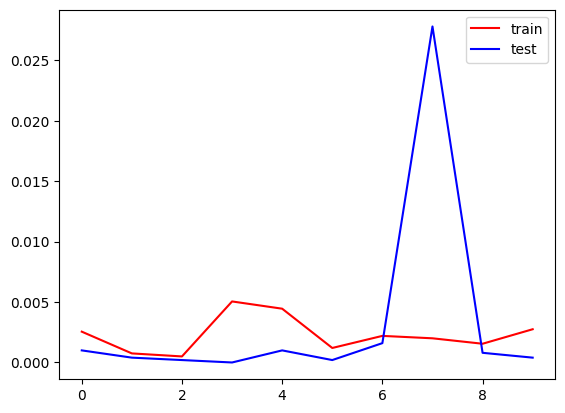

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'],color = 'red', label = 'train')
plt.plot(history.history['val_accuracy'],color = 'blue', label = 'test')
plt.legend()
plt.show()

In [ ]:
import cv2

In [ ]:
test_img = cv2.imread('/content/dog.jpg')

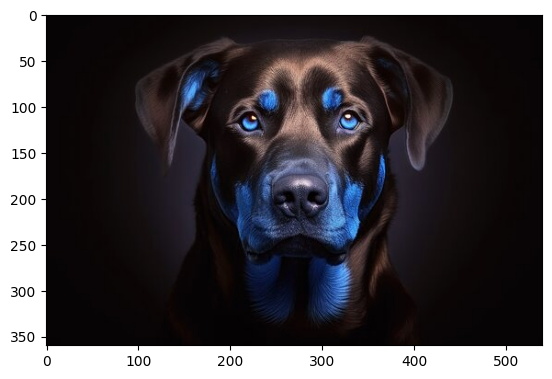

In [ ]:
plt.imshow(test_img)

In [ ]:
test_img = cv2.resize(test_img,(256,256))

In [ ]:
test_img =test_img.reshape(1,256,256,3)

In [ ]:
model.predict(test_img)

1/1 [==============================] - 0s 404ms/step


array([[1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.]],
      dtype=float32)